In [63]:
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Importing our survey data

In [64]:
file = Path('Resources/survey_results_1.xlsx')

results_df = pd.read_excel(file)
#results_dfs

# Preprocessing

In [65]:
# renaming columns for ease of understanding
survey_df = results_df.rename(columns={
    "ID":"id",
    "Start time": "start_time",
    "Completion time": "end_time",
    "Email": "email",
    "Name": "name",	
    "What is your age range?": "age",
    "Gender":"gender",	
    "Race/Ethnicity (Select all that apply)": "race",	
    "Which US Geographic Region do you live in?": "region",	
    "What is the name of your favorite TV Show?\n": "tv_show",
    "How often do you eat vegetables?": "frequency",
    "Types of veggies you most like to eat (pick your top 5!)": "to_eat",
    'What is your "go to" choice for veggies at home? (Pick your top three)': "at_home",
    'What is your "go to" choice for veggies at a restaurant (top three)': "at_restaurant",	
    "Preferred ways for cooking/preparing the choices you selected above": "cook_prep",
    "What alternative to vegetables do you use/eat to stay healthy?": "alternatives",
    "What are your top three favorite types of fruits you like to eat? (example: apples, bananas, oranges)": "fruits"})
survey_df

,id,start_time,end_time,email,name,age,gender,race,region,tv_show,frequency,to_eat,at_home,at_restaurant,cook_prep,alternatives,fruits
0,1,2022-06-04 15:01:02,2022-06-04 15:05:26,anonymous,NaN,40-49,Female,"Caucasian, non-Hispanic;",Midwest,Firefly,1/week,Asparagus ;Corn;Carrots;Spinach;Broccoli;,Lettuce (any kind);Carrots;Spinach;,Asparagus;Corn;Broccoli;,Grilled;Sauteed;Baked;,NaN,"Cherries, blueberries, pineapple"
1,2,2022-06-06 19:20:23,2022-06-06 19:22:18,anonymous,NaN,20-29,Female,Asian;,Midwest,Vincenzo,4-5/week,Broccoli;Cauliflower;Corn;Green Beans;Peas;Spi...,Broccoli;Corn;Peas;,Broccoli;Cauliflower;Corn;,Fried/Air-fried;Grilled;Sauteed;Microwaved;,NaN,Mangoes cherries oranges
2,3,2022-06-06 19:19:21,2022-06-06 19:22:26,anonymous,NaN,40-49,Female,"Caucasian, non-Hispanic;",Midwest,Ted Lasso,Daily 6-7 week,Broccoli;Carrots;Green Beans;Spinach;Squash;,Broccoli;Carrots;Squash;,Lettuce (any kind);Broccoli;Spinach;,Steamed;Baked;,NaN,"bananas, strawberries, mangos"
3,4,2022-06-06 19:20:24,2022-06-06 19:25:18,anonymous,NaN,20-29,Female,Black or African American;,Midwest,Succession,2-3/week,Broccoli;Carrots;Corn;Green Beans;Cauliflower;,Broccoli;Carrots;Cauliflower;,Broccoli;Carrots;Green Beans;,Baked;Fried/Air-fried;Steamed;,NaN,"Bananas, strawberries, oranges"
4,5,2022-06-06 19:28:42,2022-06-06 19:35:54,anonymous,NaN,30-39,Female,"Caucasian, non-Hispanic;",Midwest,Critical Role,2-3/week,Carrots;Spinach;Squash;Corn;Cauliflower;,Spinach;Carrots;Broccoli;,Spinach;Carrots;Squash;,Baked;Sauteed;,NaN,"Peaches, Oranges, Mangoes"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171,2022-06-08 07:22:36,2022-06-08 07:25:52,anonymous,NaN,50-65,Female,"Caucasian, non-Hispanic;",Midwest,Chopped,2-3/week,Corn;Broccoli;Cauliflower;Carrots;,Corn;Broccoli;,Corn;Broccoli;Lettuce (any kind);,Baked;,NaN,Blueberry
171,172,2022-06-08 08:45:06,2022-06-08 08:47:29,anonymous,NaN,40-49,Male,"Caucasian, Latino/Hispanic;",Midwest,Seinfeld,4-5/week,Broccoli;Carrots;Green Beans;,Broccoli;,Lettuce (any kind);,Microwaved;,NaN,"Bananas, strawberries, kumquat"
172,173,2022-06-08 08:47:55,2022-06-08 08:50:06,anonymous,NaN,40-49,Female,"Caucasian, non-Hispanic;",Midwest,Don't have one,Rarely (Only if someone makes me; holidays onl...,Corn;Lettuce (any kind);Spinach;Carrots;,Carrots;Corn;Lettuce (any kind);,Corn;,Steamed;,NaN,"Kiwi, mango and strawberries"
173,174,2022-06-08 21:35:14,2022-06-08 21:38:54,anonymous,NaN,50-65,Female,"Caucasian, non-Hispanic;",Midwest,Jimmy Kimmel,4-5/week,Carrots;Spinach;Broccoli;Cauliflower;Green Beans;,Carrots;Spinach;Broccoli;,Broccoli;Cauliflower;Spinach;,Sauteed;,NaN,"Bananna's, apples & oranges"


In [66]:
# this cell splits columns with multiple answers into their own columns, drops any extra answers beyond what was asked for, and names the new columns
# the result is five baby dataframes

drop_list_five = [0,1,2,3,4]
drop_list_three = [0,1,2]

# SPLIT COLUMNS WITH MULTIPLE SELECTIONS
to_eat_test = survey_df["to_eat"].str.split(';', expand = True)
at_home_test = survey_df["at_home"].str.split(';', expand = True)
at_restaurant_test = survey_df["at_restaurant"].str.split(';', expand = True)
cook_prep_test = survey_df["cook_prep"].str.split(';', expand = True)
fruits_test = survey_df["fruits"].str.split(', ', expand = True)

# drop any columns that come after our drop list
top_to_eat = to_eat_test.drop(to_eat_test.columns.difference(drop_list_five), axis = 1)
top_at_home = at_home_test.drop(at_home_test.columns.difference(drop_list_three), axis = 1)
top_at_restaurant = at_restaurant_test.drop(at_restaurant_test.columns.difference(drop_list_three), axis = 1)
top_cook_prep = cook_prep_test.drop(cook_prep_test.columns.difference(drop_list_three), axis = 1)
top_fruits = fruits_test.drop(fruits_test.columns.difference(drop_list_three), axis = 1)

# rename the new columns
top_to_eat = top_to_eat.rename(columns = {0:"to_eat_1", 1: "to_eat_2", 2: "to_eat_3", 3: "to_eat_4", 4: "to_eat_5"})
top_at_home = top_at_home.rename(columns = {0:"at_home_1", 1: "at_home_2", 2: "at_home_3"})
top_at_restaurant = top_at_restaurant.rename(columns = {0:"at_restaurant_1", 1: "at_restaurant_2", 2: "at_restaurant_3"})
top_cook_prep = top_cook_prep.rename(columns = {0:"cook_prep_1", 1: "cook_prep_2", 2: "cook_prep_3"})
top_fruits = top_fruits.rename(columns = {0:"fruits_1", 1: "fruits_2", 2: "fruits_3"})

In [67]:
# creating a list of new dataframes
df_list = [top_to_eat, top_at_home, top_at_restaurant,top_cook_prep, top_fruits]
# pd.merge(pd.merge(top_to_eat,top_at_home,on='id'),top_at_restaurant,on='id')

# merging the five new dataframes into one new dataframe
df = df_list[0]
for df_ in df_list[1:]:
    df = df.merge(df_, left_index=True, right_index=True)

# adding this new dataframe back into survey_df 
for column in df:
     
    # Select column conents by column
    # name using [] operator
    survey_df[column] = df[column]

print(survey_df.keys())

Index(['id', 'start_time', 'end_time', 'email', 'name', 'age', 'gender',
       'race', 'region', 'tv_show', 'frequency', 'to_eat', 'at_home',
       'at_restaurant', 'cook_prep', 'alternatives', 'fruits', 'to_eat_1',
       'to_eat_2', 'to_eat_3', 'to_eat_4', 'to_eat_5', 'at_home_1',
       'at_home_2', 'at_home_3', 'at_restaurant_1', 'at_restaurant_2',
       'at_restaurant_3', 'cook_prep_1', 'cook_prep_2', 'cook_prep_3',
       'fruits_1', 'fruits_2', 'fruits_3'],
      dtype='object')


In [68]:
# dropping non-beneficial columns
survey_df.drop(['start_time', 'end_time', 'email', 'name', 'alternatives', 'to_eat', 'at_home', 'at_restaurant','cook_prep', 'fruits'], axis=1, inplace=True)
survey_df

,id,age,gender,race,region,tv_show,frequency,to_eat_1,to_eat_2,to_eat_3,...,at_home_3,at_restaurant_1,at_restaurant_2,at_restaurant_3,cook_prep_1,cook_prep_2,cook_prep_3,fruits_1,fruits_2,fruits_3
0,1,40-49,Female,"Caucasian, non-Hispanic;",Midwest,Firefly,1/week,Asparagus,Corn,Carrots,...,Spinach,Asparagus,Corn,Broccoli,Grilled,Sauteed,Baked,Cherries,blueberries,pineapple
1,2,20-29,Female,Asian;,Midwest,Vincenzo,4-5/week,Broccoli,Cauliflower,Corn,...,Peas,Broccoli,Cauliflower,Corn,Fried/Air-fried,Grilled,Sauteed,Mangoes cherries oranges,None,None
2,3,40-49,Female,"Caucasian, non-Hispanic;",Midwest,Ted Lasso,Daily 6-7 week,Broccoli,Carrots,Green Beans,...,Squash,Lettuce (any kind),Broccoli,Spinach,Steamed,Baked,,bananas,strawberries,mangos
3,4,20-29,Female,Black or African American;,Midwest,Succession,2-3/week,Broccoli,Carrots,Corn,...,Cauliflower,Broccoli,Carrots,Green Beans,Baked,Fried/Air-fried,Steamed,Bananas,strawberries,oranges
4,5,30-39,Female,"Caucasian, non-Hispanic;",Midwest,Critical Role,2-3/week,Carrots,Spinach,Squash,...,Broccoli,Spinach,Carrots,Squash,Baked,Sauteed,,Peaches,Oranges,Mangoes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171,50-65,Female,"Caucasian, non-Hispanic;",Midwest,Chopped,2-3/week,Corn,Broccoli,Cauliflower,...,,Corn,Broccoli,Lettuce (any kind),Baked,,None,Blueberry,None,None
171,172,40-49,Male,"Caucasian, Latino/Hispanic;",Midwest,Seinfeld,4-5/week,Broccoli,Carrots,Green Beans,...,None,Lettuce (any kind),,None,Microwaved,,None,Bananas,strawberries,kumquat
172,173,40-49,Female,"Caucasian, non-Hispanic;",Midwest,Don't have one,Rarely (Only if someone makes me; holidays onl...,Corn,Lettuce (any kind),Spinach,...,Lettuce (any kind),Corn,,None,Steamed,,None,Kiwi,mango and strawberries,None
173,174,50-65,Female,"Caucasian, non-Hispanic;",Midwest,Jimmy Kimmel,4-5/week,Carrots,Spinach,Broccoli,...,Broccoli,Broccoli,Cauliflower,Spinach,Sauteed,,None,Bananna's,apples & oranges,None


In [69]:
# capitalizing all values
survey_df = survey_df.apply(lambda x: x.astype(str).str.upper())
survey_df

,id,age,gender,race,region,tv_show,frequency,to_eat_1,to_eat_2,to_eat_3,...,at_home_3,at_restaurant_1,at_restaurant_2,at_restaurant_3,cook_prep_1,cook_prep_2,cook_prep_3,fruits_1,fruits_2,fruits_3
0,1,40-49,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,FIREFLY,1/WEEK,ASPARAGUS,CORN,CARROTS,...,SPINACH,ASPARAGUS,CORN,BROCCOLI,GRILLED,SAUTEED,BAKED,CHERRIES,BLUEBERRIES,PINEAPPLE
1,2,20-29,FEMALE,ASIAN;,MIDWEST,VINCENZO,4-5/WEEK,BROCCOLI,CAULIFLOWER,CORN,...,PEAS,BROCCOLI,CAULIFLOWER,CORN,FRIED/AIR-FRIED,GRILLED,SAUTEED,MANGOES CHERRIES ORANGES,NONE,NONE
2,3,40-49,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,TED LASSO,DAILY 6-7 WEEK,BROCCOLI,CARROTS,GREEN BEANS,...,SQUASH,LETTUCE (ANY KIND),BROCCOLI,SPINACH,STEAMED,BAKED,,BANANAS,STRAWBERRIES,MANGOS
3,4,20-29,FEMALE,BLACK OR AFRICAN AMERICAN;,MIDWEST,SUCCESSION,2-3/WEEK,BROCCOLI,CARROTS,CORN,...,CAULIFLOWER,BROCCOLI,CARROTS,GREEN BEANS,BAKED,FRIED/AIR-FRIED,STEAMED,BANANAS,STRAWBERRIES,ORANGES
4,5,30-39,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,CRITICAL ROLE,2-3/WEEK,CARROTS,SPINACH,SQUASH,...,BROCCOLI,SPINACH,CARROTS,SQUASH,BAKED,SAUTEED,,PEACHES,ORANGES,MANGOES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171,50-65,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,CHOPPED,2-3/WEEK,CORN,BROCCOLI,CAULIFLOWER,...,,CORN,BROCCOLI,LETTUCE (ANY KIND),BAKED,,NONE,BLUEBERRY,NONE,NONE
171,172,40-49,MALE,"CAUCASIAN, LATINO/HISPANIC;",MIDWEST,SEINFELD,4-5/WEEK,BROCCOLI,CARROTS,GREEN BEANS,...,NONE,LETTUCE (ANY KIND),,NONE,MICROWAVED,,NONE,BANANAS,STRAWBERRIES,KUMQUAT
172,173,40-49,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,DON'T HAVE ONE,RARELY (ONLY IF SOMEONE MAKES ME; HOLIDAYS ONL...,CORN,LETTUCE (ANY KIND),SPINACH,...,LETTUCE (ANY KIND),CORN,,NONE,STEAMED,,NONE,KIWI,MANGO AND STRAWBERRIES,NONE
173,174,50-65,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,JIMMY KIMMEL,4-5/WEEK,CARROTS,SPINACH,BROCCOLI,...,BROCCOLI,BROCCOLI,CAULIFLOWER,SPINACH,SAUTEED,,NONE,BANANNA'S,APPLES & ORANGES,NONE


In [70]:
# doing some manual cleaning
survey_df['fruits_1'] = survey_df['fruits_1'].replace(
    ['BANANA', 'MANGO', 'MANGOES', 'STRAWBERRY', 'APPLE', 'BLUE BERRIES', 'BLUEBERRY', 'PEACH', 'APPLE’S', ' APPLES', 'ORANGE', 'PEAR', 'CLEMENTINE', 'MANDERIN ORANGES', 'TANGERINES', 'RAINER CHERRIES', 'RED GRAPES', 'CLEMENTINES', 'RASPBERRY ', '(NAVEL) ORANGES'], 
    ['BANANAS', 'MANGOS', 'MANGOS', 'STRAWBERRIES', 'APPLES', 'BLUEBERRIES', 'BLUEBERRIES', 'PEACHES', 'APPLES', 'APPLES', 'ORANGES', 'PEARS', 'ORANGES', 'ORANGES', 'ORANGES', 'CHERRIES', 'GRAPES', 'ORANGES', 'RASPBERRIES', 'ORANGES'])

survey_df['fruits_2'] = survey_df['fruits_2'].replace(
    ['BANANA', 'MANGO', 'MANGOES', 'STRAWBERRY', 'APPLE', 'BLUE BERRIES', 'BLUEBERRY', 'PEACH', 'APPLE’S', ' APPLES', 'ORANGE', 'PEAR', 'CLEMENTINE', 'MANDERIN ORANGES', 'TANGERINES', 'RAINER CHERRIES', 'RED GRAPES', 'CLEMENTINES', 'RASPBERRY ', '(NAVEL) ORANGES'], 
    ['BANANAS', 'MANGOS', 'MANGOS', 'STRAWBERRIES', 'APPLES', 'BLUEBERRIES', 'BLUEBERRIES', 'PEACHES', 'APPLES', 'APPLES', 'ORANGES', 'PEARS', 'ORANGES', 'ORANGES', 'ORANGES', 'CHERRIES', 'GRAPES', 'ORANGES', 'RASPBERRIES', 'ORANGES'])

survey_df['fruits_3'] = survey_df['fruits_3'].replace(
    ['BANANA', 'MANGO', 'MANGOES', 'STRAWBERRY', 'APPLE', 'BLUE BERRIES', 'BLUEBERRY', 'PEACH', 'APPLE’S', ' APPLES', 'ORANGE', 'PEAR', 'CLEMENTINE', 'MANDERIN ORANGES', 'TANGERINES', 'RAINER CHERRIES', 'RED GRAPES', 'CLEMENTINES', 'RASPBERRY ', '(NAVEL) ORANGES'], 
    ['BANANAS', 'MANGOS', 'MANGOS', 'STRAWBERRIES', 'APPLES', 'BLUEBERRIES', 'BLUEBERRIES', 'PEACHES', 'APPLES', 'APPLES', 'ORANGES', 'PEARS', 'ORANGES', 'ORANGES', 'ORANGES', 'CHERRIES', 'GRAPES', 'ORANGES', 'RASPBERRIES', 'ORANGES'])


In [71]:
# determine the number of unique values in each column
survey_cat = survey_df.dtypes.index.tolist()
survey_df[survey_cat].nunique()

id                 175
age                  7
gender               3
race                11
region              10
tv_show            129
frequency            5
to_eat_1            14
to_eat_2            12
to_eat_3            15
to_eat_4            24
to_eat_5            31
at_home_1           18
at_home_2           16
at_home_3           25
at_restaurant_1     20
at_restaurant_2     16
at_restaurant_3     25
cook_prep_1         11
cook_prep_2         10
cook_prep_3         12
fruits_1            46
fruits_2            45
fruits_3            45
dtype: int64

In [72]:
# look at fruits_1 value counts for binning
fruits_1_count = survey_df['fruits_1'].value_counts()
fruits_1_count

BANANAS                               31
APPLES                                30
STRAWBERRIES                          17
BLUEBERRIES                           14
MANGOS                                11
ORANGES                                9
GRAPES                                 8
BLACKBERRIES                           4
PINEAPPLE                              4
CHERRIES                               3
RASPBERRIES                            3
WATERMELON                             3
BERRIES                                3
KIWI                                   2
PEACHES                                2
GRAPES WATER MELON                     1
GRAPES APPLES BANANAS                  1
PINEAPPLES                             1
BLUEBERR                               1
BLUEBERRY                              1
GRAPEFRUIT                             1
GRAPES,WATERMELON,STRAWBERRY           1
STRAWBERRY,WATERMELON,GRAPES           1
MELON                                  1
GRAPEFRUIT APPLE

In [73]:
# bin all the fruits that have just 1 response together into "other"
fruits_1_to_replace = list(fruits_1_count[fruits_1_count == 1].index)

# replace in dataframe
for fruit in fruits_1_to_replace:
    survey_df['fruits_1'] = survey_df['fruits_1'].replace(fruit, "OTHER")

# check to make sure binning was successful
survey_df['fruits_1'].value_counts()

OTHER           31
BANANAS         31
APPLES          30
STRAWBERRIES    17
BLUEBERRIES     14
MANGOS          11
ORANGES          9
GRAPES           8
BLACKBERRIES     4
PINEAPPLE        4
CHERRIES         3
WATERMELON       3
RASPBERRIES      3
BERRIES          3
PEACHES          2
KIWI             2
Name: fruits_1, dtype: int64

In [74]:
# look at fruits_2 value counts for binning
fruits_2_count = survey_df['fruits_2'].value_counts()
fruits_2_count.head(30)

NONE                       25
GRAPES                     17
BANANAS                    17
STRAWBERRIES               15
BLUEBERRIES                11
ORANGES                    11
APPLES                     11
MANGOS                      9
WATERMELON                  7
RASPBERRIES                 5
PINEAPPLE                   5
PEACHES                     4
PEARS                       3
CANTELOPE                   2
GRAPEFRUIT                  2
CHERRIES                    2
PINEAPPLES                  1
PAPAYA                      1
 MANGO AND STRAWBERRIES     1
BLACKBERRIES                1
AVOCADO                     1
CITRUS                      1
PLUMS                       1
LYNCHES AND JACK FRUIT      1
BERRIES                     1
MELON                       1
RASPBERRY                   1
HONEYDEW (ANY) MELONS       1
TOMATOES                    1
GRAPES,APPLES               1
Name: fruits_2, dtype: int64

In [75]:
# bin all the fruits that have just 1 response together into "other"
fruits_2_to_replace = list(fruits_2_count[fruits_2_count == 1].index)

# replace in dataframe
for fruit in fruits_2_to_replace:
    survey_df['fruits_2'] = survey_df['fruits_2'].replace(fruit, "OTHER")

# check to make sure binning was successful
survey_df['fruits_2'].value_counts()

OTHER           29
NONE            25
GRAPES          17
BANANAS         17
STRAWBERRIES    15
BLUEBERRIES     11
APPLES          11
ORANGES         11
MANGOS           9
WATERMELON       7
PINEAPPLE        5
RASPBERRIES      5
PEACHES          4
PEARS            3
GRAPEFRUIT       2
CHERRIES         2
CANTELOPE        2
Name: fruits_2, dtype: int64

In [76]:
# look at fruits_3 value counts for binning
fruits_3_count = survey_df['fruits_3'].value_counts()
fruits_3_count.head(30)

NONE             36
GRAPES           18
BANANAS          13
APPLES           12
ORANGES          10
STRAWBERRIES      8
KIWI              5
PINEAPPLE         5
WATERMELON        5
MANGOS            4
BLUEBERRIES       4
RASPBERRIES       4
BLUEBERRIES       4
PEACHES           4
WATERMELON        3
BLACKBERRIES      3
CHERRIES          3
STRAWBERRIES      3
ORANGES           2
BERRIES           2
GRAPES            2
BANANAS           2
GRAPEFRUIT        1
BANANA            1
NECTARINES        1
POMEGRANATES      1
CANTELOPE         1
 WATERMELON       1
LIMES             1
CHERRIES          1
Name: fruits_3, dtype: int64

In [77]:
# bin all the fruits that have just 1 response together into "other"
fruits_3_to_replace = list(fruits_3_count[fruits_3_count == 1].index)

# replace in dataframe
for fruit in fruits_3_to_replace:
    survey_df['fruits_3'] = survey_df['fruits_3'].replace(fruit, "OTHER")

# check to make sure binning was successful
survey_df['fruits_3'].value_counts()

NONE             36
OTHER            23
GRAPES           18
BANANAS          13
APPLES           12
ORANGES          10
STRAWBERRIES      8
KIWI              5
PINEAPPLE         5
WATERMELON        5
MANGOS            4
RASPBERRIES       4
BLUEBERRIES       4
BLUEBERRIES       4
PEACHES           4
WATERMELON        3
STRAWBERRIES      3
BLACKBERRIES      3
CHERRIES          3
ORANGES           2
BANANAS           2
BERRIES           2
GRAPES            2
Name: fruits_3, dtype: int64

In [78]:
survey_df

,id,age,gender,race,region,tv_show,frequency,to_eat_1,to_eat_2,to_eat_3,...,at_home_3,at_restaurant_1,at_restaurant_2,at_restaurant_3,cook_prep_1,cook_prep_2,cook_prep_3,fruits_1,fruits_2,fruits_3
0,1,40-49,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,FIREFLY,1/WEEK,ASPARAGUS,CORN,CARROTS,...,SPINACH,ASPARAGUS,CORN,BROCCOLI,GRILLED,SAUTEED,BAKED,CHERRIES,BLUEBERRIES,OTHER
1,2,20-29,FEMALE,ASIAN;,MIDWEST,VINCENZO,4-5/WEEK,BROCCOLI,CAULIFLOWER,CORN,...,PEAS,BROCCOLI,CAULIFLOWER,CORN,FRIED/AIR-FRIED,GRILLED,SAUTEED,OTHER,NONE,NONE
2,3,40-49,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,TED LASSO,DAILY 6-7 WEEK,BROCCOLI,CARROTS,GREEN BEANS,...,SQUASH,LETTUCE (ANY KIND),BROCCOLI,SPINACH,STEAMED,BAKED,,BANANAS,STRAWBERRIES,MANGOS
3,4,20-29,FEMALE,BLACK OR AFRICAN AMERICAN;,MIDWEST,SUCCESSION,2-3/WEEK,BROCCOLI,CARROTS,CORN,...,CAULIFLOWER,BROCCOLI,CARROTS,GREEN BEANS,BAKED,FRIED/AIR-FRIED,STEAMED,BANANAS,STRAWBERRIES,ORANGES
4,5,30-39,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,CRITICAL ROLE,2-3/WEEK,CARROTS,SPINACH,SQUASH,...,BROCCOLI,SPINACH,CARROTS,SQUASH,BAKED,SAUTEED,,PEACHES,ORANGES,MANGOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171,50-65,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,CHOPPED,2-3/WEEK,CORN,BROCCOLI,CAULIFLOWER,...,,CORN,BROCCOLI,LETTUCE (ANY KIND),BAKED,,NONE,OTHER,NONE,NONE
171,172,40-49,MALE,"CAUCASIAN, LATINO/HISPANIC;",MIDWEST,SEINFELD,4-5/WEEK,BROCCOLI,CARROTS,GREEN BEANS,...,NONE,LETTUCE (ANY KIND),,NONE,MICROWAVED,,NONE,BANANAS,STRAWBERRIES,OTHER
172,173,40-49,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,DON'T HAVE ONE,RARELY (ONLY IF SOMEONE MAKES ME; HOLIDAYS ONL...,CORN,LETTUCE (ANY KIND),SPINACH,...,LETTUCE (ANY KIND),CORN,,NONE,STEAMED,,NONE,KIWI,OTHER,NONE
173,174,50-65,FEMALE,"CAUCASIAN, NON-HISPANIC;",MIDWEST,JIMMY KIMMEL,4-5/WEEK,CARROTS,SPINACH,BROCCOLI,...,BROCCOLI,BROCCOLI,CAULIFLOWER,SPINACH,SAUTEED,,NONE,OTHER,OTHER,NONE


In [79]:
# re-look at the number of unique values in each column now that the fruits have been binned
survey_cat = survey_df.dtypes.index.tolist()
survey_df[survey_cat].nunique()

id                 175
age                  7
gender               3
race                11
region              10
tv_show            129
frequency            5
to_eat_1            14
to_eat_2            12
to_eat_3            15
to_eat_4            24
to_eat_5            31
at_home_1           18
at_home_2           16
at_home_3           25
at_restaurant_1     20
at_restaurant_2     16
at_restaurant_3     25
cook_prep_1         11
cook_prep_2         10
cook_prep_3         12
fruits_1            16
fruits_2            17
fruits_3            23
dtype: int64

In [80]:
# make sure there are no null values
for column in survey_df.columns:
    print(f"Column {column} has {survey_df[column].isnull().sum()} null values")

Column id has 0 null values
Column age has 0 null values
Column gender has 0 null values
Column race has 0 null values
Column region has 0 null values
Column tv_show has 0 null values
Column frequency has 0 null values
Column to_eat_1 has 0 null values
Column to_eat_2 has 0 null values
Column to_eat_3 has 0 null values
Column to_eat_4 has 0 null values
Column to_eat_5 has 0 null values
Column at_home_1 has 0 null values
Column at_home_2 has 0 null values
Column at_home_3 has 0 null values
Column at_restaurant_1 has 0 null values
Column at_restaurant_2 has 0 null values
Column at_restaurant_3 has 0 null values
Column cook_prep_1 has 0 null values
Column cook_prep_2 has 0 null values
Column cook_prep_3 has 0 null values
Column fruits_1 has 0 null values
Column fruits_2 has 0 null values
Column fruits_3 has 0 null values


## Should we add "NaN" to the blank cells? I'm not sure how...

In [81]:
# look at gender value counts 
gender_count = survey_df['gender'].value_counts()
gender_count

FEMALE    133
MALE       41
TREE        1
Name: gender, dtype: int64

In [82]:
# transform the gender column
def changeStatus(status):
    if status == "FEMALE":
        return 1
    if status == "MALE":
        return 0
    else:
        return 3

# Along with replace() and map(), this is another way to encode the gender column into numbers.
survey_df["gender"] = survey_df["gender"].apply(changeStatus)
survey_df

,id,age,gender,race,region,tv_show,frequency,to_eat_1,to_eat_2,to_eat_3,...,at_home_3,at_restaurant_1,at_restaurant_2,at_restaurant_3,cook_prep_1,cook_prep_2,cook_prep_3,fruits_1,fruits_2,fruits_3
0,1,40-49,1,"CAUCASIAN, NON-HISPANIC;",MIDWEST,FIREFLY,1/WEEK,ASPARAGUS,CORN,CARROTS,...,SPINACH,ASPARAGUS,CORN,BROCCOLI,GRILLED,SAUTEED,BAKED,CHERRIES,BLUEBERRIES,OTHER
1,2,20-29,1,ASIAN;,MIDWEST,VINCENZO,4-5/WEEK,BROCCOLI,CAULIFLOWER,CORN,...,PEAS,BROCCOLI,CAULIFLOWER,CORN,FRIED/AIR-FRIED,GRILLED,SAUTEED,OTHER,NONE,NONE
2,3,40-49,1,"CAUCASIAN, NON-HISPANIC;",MIDWEST,TED LASSO,DAILY 6-7 WEEK,BROCCOLI,CARROTS,GREEN BEANS,...,SQUASH,LETTUCE (ANY KIND),BROCCOLI,SPINACH,STEAMED,BAKED,,BANANAS,STRAWBERRIES,MANGOS
3,4,20-29,1,BLACK OR AFRICAN AMERICAN;,MIDWEST,SUCCESSION,2-3/WEEK,BROCCOLI,CARROTS,CORN,...,CAULIFLOWER,BROCCOLI,CARROTS,GREEN BEANS,BAKED,FRIED/AIR-FRIED,STEAMED,BANANAS,STRAWBERRIES,ORANGES
4,5,30-39,1,"CAUCASIAN, NON-HISPANIC;",MIDWEST,CRITICAL ROLE,2-3/WEEK,CARROTS,SPINACH,SQUASH,...,BROCCOLI,SPINACH,CARROTS,SQUASH,BAKED,SAUTEED,,PEACHES,ORANGES,MANGOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171,50-65,1,"CAUCASIAN, NON-HISPANIC;",MIDWEST,CHOPPED,2-3/WEEK,CORN,BROCCOLI,CAULIFLOWER,...,,CORN,BROCCOLI,LETTUCE (ANY KIND),BAKED,,NONE,OTHER,NONE,NONE
171,172,40-49,0,"CAUCASIAN, LATINO/HISPANIC;",MIDWEST,SEINFELD,4-5/WEEK,BROCCOLI,CARROTS,GREEN BEANS,...,NONE,LETTUCE (ANY KIND),,NONE,MICROWAVED,,NONE,BANANAS,STRAWBERRIES,OTHER
172,173,40-49,1,"CAUCASIAN, NON-HISPANIC;",MIDWEST,DON'T HAVE ONE,RARELY (ONLY IF SOMEONE MAKES ME; HOLIDAYS ONL...,CORN,LETTUCE (ANY KIND),SPINACH,...,LETTUCE (ANY KIND),CORN,,NONE,STEAMED,,NONE,KIWI,OTHER,NONE
173,174,50-65,1,"CAUCASIAN, NON-HISPANIC;",MIDWEST,JIMMY KIMMEL,4-5/WEEK,CARROTS,SPINACH,BROCCOLI,...,BROCCOLI,BROCCOLI,CAULIFLOWER,SPINACH,SAUTEED,,NONE,OTHER,OTHER,NONE


In [83]:
survey_df_columns = survey_df.columns.values.tolist()
survey_df_columns.remove('gender')
survey_df_columns

['id',
 'age',
 'race',
 'region',
 'tv_show',
 'frequency',
 'to_eat_1',
 'to_eat_2',
 'to_eat_3',
 'to_eat_4',
 'to_eat_5',
 'at_home_1',
 'at_home_2',
 'at_home_3',
 'at_restaurant_1',
 'at_restaurant_2',
 'at_restaurant_3',
 'cook_prep_1',
 'cook_prep_2',
 'cook_prep_3',
 'fruits_1',
 'fruits_2',
 'fruits_3']

In [84]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_survey_df = pd.get_dummies(survey_df)
numeric_survey_df

,gender,id_1,id_10,id_100,id_101,id_102,id_103,id_104,id_105,id_106,...,fruits_3_ORANGES,fruits_3_ORANGES,fruits_3_OTHER,fruits_3_PEACHES,fruits_3_PINEAPPLE,fruits_3_RASPBERRIES,fruits_3_STRAWBERRIES,fruits_3_STRAWBERRIES,fruits_3_WATERMELON,fruits_3_WATERMELON
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
172,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# survey_df['age'] = survey_df['age'].astype('float128')

In [86]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(numeric_survey_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,3299.257143
1,2,3171.435811
2,3,3094.139921
3,4,3058.030731
4,5,3024.409978


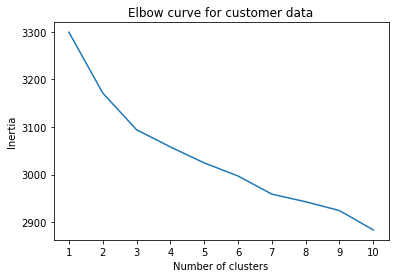

In [87]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [88]:
# get_clusters function
model = KMeans(n_clusters=3, random_state=0)
model.fit(numeric_survey_df)
predictions = model.predict(numeric_survey_df)
numeric_survey_df_classed = numeric_survey_df
numeric_survey_df_classed

,gender,id_1,id_10,id_100,id_101,id_102,id_103,id_104,id_105,id_106,...,fruits_3_ORANGES,fruits_3_ORANGES,fruits_3_OTHER,fruits_3_PEACHES,fruits_3_PINEAPPLE,fruits_3_RASPBERRIES,fruits_3_STRAWBERRIES,fruits_3_STRAWBERRIES,fruits_3_WATERMELON,fruits_3_WATERMELON
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
172,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [90]:
clusters = get_clusters(3, numeric_survey_df)
clusters

,gender,id_1,id_10,id_100,id_101,id_102,id_103,id_104,id_105,id_106,...,fruits_3_ORANGES,fruits_3_OTHER,fruits_3_PEACHES,fruits_3_PINEAPPLE,fruits_3_RASPBERRIES,fruits_3_STRAWBERRIES,fruits_3_STRAWBERRIES,fruits_3_WATERMELON,fruits_3_WATERMELON,class
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
171,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
172,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


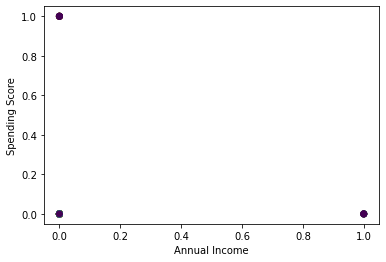

In [91]:
def show_clusters(df):
    plt.scatter(df['fruits_3_ORANGES'], df['fruits_3_APPLES'], c=df['class'])
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()

show_clusters(clusters)

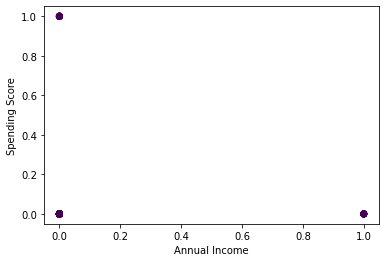

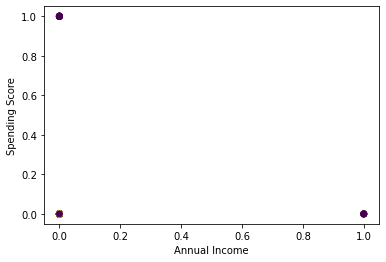

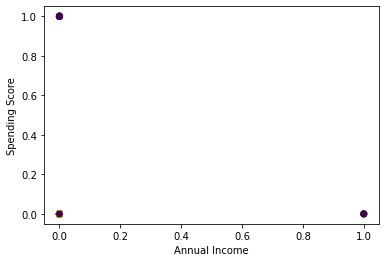

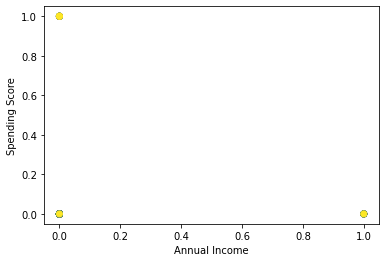

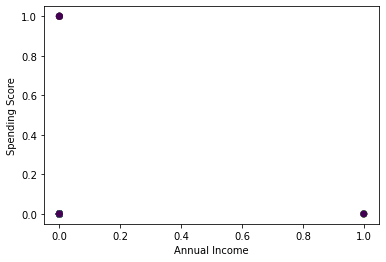

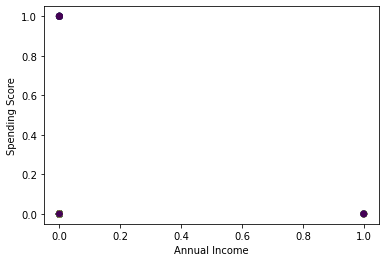

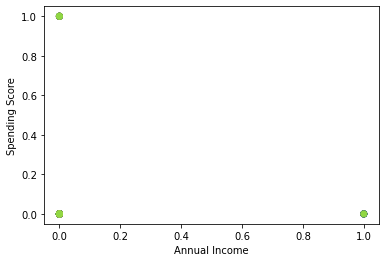

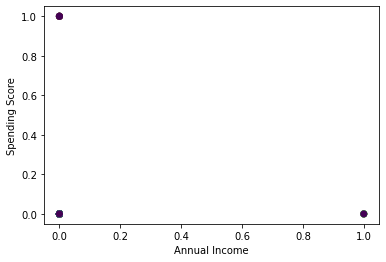

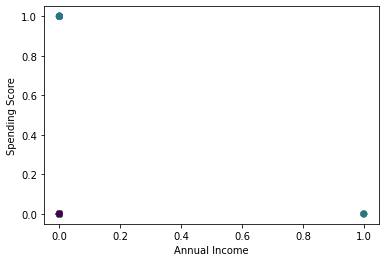

In [92]:
for k in range(1, 10):
    show_clusters(get_clusters(k, numeric_survey_df))

In [93]:
# UNIQUE VEGETABLES FROM FAVORITES TO EAT
veggie_list = []

for veggie in survey_df['to_eat_1'].unique():
    if veggie not in veggie_list:
        veggie_list.append(veggie)
for veggie in survey_df['to_eat_2'].unique():
    if veggie not in veggie_list:
        veggie_list.append(veggie)
for veggie in survey_df['to_eat_3'].unique():
    if veggie not in veggie_list:
        veggie_list.append(veggie)
for veggie in survey_df['to_eat_4'].unique():
    if veggie not in veggie_list:
        veggie_list.append(veggie)
for veggie in survey_df['to_eat_5'].unique():
    if veggie not in veggie_list:
        veggie_list.append(veggie)
veggie_list
# len(veggie_list)

['ASPARAGUS ',
 'BROCCOLI',
 'CARROTS',
 'SPINACH',
 'CORN',
 'LETTUCE (ANY KIND)',
 'SAUERKRAUT/CABBAGE',
 'PEAS',
 'GREEN BEANS',
 'CABBAGE',
 'CAULIFLOWER',
 'SQUASH',
 'EGGPLANT',
 'CUCUMBER',
 '',
 'BRUSSELS SPROUTS',
 'RED PEPPER AND CUCUMBER',
 'TOMATO ',
 'NONE',
 'CUCUMBERS',
 'ASPARAGUS, BRUSSEL SPROUTS ',
 'BEATS, TOMATO',
 'GREEN PEPPER',
 'TOMATOES',
 'BEETS',
 'RADISH',
 'ONIONS, TOMATOES ',
 'ASPARAGUS AND BRUSSEL SPROUTS',
 'BELL PEPPER AND ONIONS ',
 'BELL PEPPER ',
 'BELL PEPPERS, ASPARAGUS',
 'EGGPLANT OKRA',
 'SWEET POTATOES ',
 'ASPARAGUS',
 'BRUSSEL SPROUTS',
 'BRUSSEL SPROUTS ',
 'CORN IS A GRAIN, NOT A VEGETABLE',
 'ASPARAGUBRUSSELS SPROUT, POTATOESTOES',
 'COLLARD GREENS',
 'BAKED BEANS',
 'BELL PEPPERS',
 'CELERY AND CUCUMBER ',
 'PEPPERS GREEN, ORANGE, YELLOW',
 'LETTUCE - BUT ONLY "NORMAL" LETTUCE (ICEBERG OR ROMAINE)',
 'PINTO BEANS',
 'POTATOES',
 'BLACK BEANS']

In [126]:
veggie_list = pd.DataFrame(veggie_list)

veggie_list['veggie_name'] = veggie_list[0]
test = []
for i in range(0,len(veggie_list)):
    test.append(i+1)

veggie_list

veggie_list['veg_id'] = test

veggie_list

,0,veg_id,veggie_name
0,ASPARAGUS,1,ASPARAGUS
1,BROCCOLI,2,BROCCOLI
2,CARROTS,3,CARROTS
3,SPINACH,4,SPINACH
4,CORN,5,CORN
5,LETTUCE (ANY KIND),6,LETTUCE (ANY KIND)
6,SAUERKRAUT/CABBAGE,7,SAUERKRAUT/CABBAGE
7,PEAS,8,PEAS
8,GREEN BEANS,9,GREEN BEANS
9,CABBAGE,10,CABBAGE


### Data Preparation for Collaborative Filtering

In [104]:
# IMPORT FAST AI DEPENDENCIES
from fastai.collab import CollabDataBunch, collab_learner

In [106]:
survey_subset = survey_df[['id','to_eat_1', 'to_eat_2', 'to_eat_3','to_eat_4','to_eat_5']]
survey_subset

,id,to_eat_1,to_eat_2,to_eat_3,to_eat_4,to_eat_5
0,1,ASPARAGUS,CORN,CARROTS,SPINACH,BROCCOLI
1,2,BROCCOLI,CAULIFLOWER,CORN,GREEN BEANS,PEAS
2,3,BROCCOLI,CARROTS,GREEN BEANS,SPINACH,SQUASH
3,4,BROCCOLI,CARROTS,CORN,GREEN BEANS,CAULIFLOWER
4,5,CARROTS,SPINACH,SQUASH,CORN,CAULIFLOWER
...,...,...,...,...,...,...
170,171,CORN,BROCCOLI,CAULIFLOWER,CARROTS,
171,172,BROCCOLI,CARROTS,GREEN BEANS,,NONE
172,173,CORN,LETTUCE (ANY KIND),SPINACH,CARROTS,
173,174,CARROTS,SPINACH,BROCCOLI,CAULIFLOWER,GREEN BEANS


In [135]:
#Creating dataframe for collaborative filtering
survey = pd.melt(survey_subset, id_vars=['id'], 
                   var_name="value", 
                  value_name="veggie")
survey = survey.sort_values(['id'])
survey = survey.drop('value',axis=1)
survey

survey = pd.merge(survey,veggie_list,left_on='veggie',right_on='veggie_name')
survey = survey[['id','veg_id']]
survey['like'] = 1
survey


,id,veg_id,like
0,1,1,1
1,35,1,1
2,42,1,1
3,49,1,1
4,95,1,1
...,...,...,...
870,74,38,1
871,75,27,1
872,91,28,1
873,92,39,1


In [203]:
#Creating datafrme with to indicate which fruits weren't in a user's top 5 (like=0)
z_user = []
z_veg = []
# data_zero = []
for user in survey['id'].unique():
    for veg in veggie_list['veg_id']:
        if veg not in survey['veg_id'][survey['id']==user].to_list():
            z_user.append(user)
            z_veg.append(veg)

zeros = pd.DataFrame()
zeros['id'] = z_user
zeros['veg_id'] = z_veg
zeros['like'] = 0
zeros

,id,veg_id,like
0,1,6,0
1,1,7,0
2,1,8,0
3,1,9,0
4,1,10,0
...,...,...,...
7356,17,43,0
7357,17,44,0
7358,17,45,0
7359,17,46,0


In [206]:
import random

In [226]:
#Viewing shape of the survey results to ensure that df created for 0s matches
survey.shape
zeros.shape

lr = range(1,zeros.shape[0])
needed_rows = survey.shape[0]
random.choices(lr, k=3)

# Using random generator to select an equal number of rows that have 0
zeros_sel  = zeros.iloc[random.choices(lr, k=needed_rows)]
zeros_sel

,id,veg_id,like
4407,87,44,0
6776,67,17,0
5698,34,33,0
7304,124,35,0
388,106,16,0
...,...,...,...
5998,75,39,0
1,1,7,0
1763,152,46,0
7091,84,38,0


In [232]:
# Joining data set of veggies in top 5 (like=1) and non top 5 veggies (like=0)
cf_data = pd.concat([survey, zeros_sel])
cf_data['like'].value_counts()


1    875
0    875
Name: like, dtype: int64

### Collaborate Filtering

In [233]:
data = CollabDataBunch.from_df(cf_data, valid_pct=0.1)
data.show_batch()

[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


id,veg_id,target
18,6,1.0
104,4,1.0
28,45,0.0
7,4,1.0
173,26,0.0


epoch,train_loss,valid_loss,time
0,5.296935,#na#,00:00
1,5.288236,#na#,00:00
2,4.942178,#na#,00:00
3,3.001938,#na#,00:00


[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


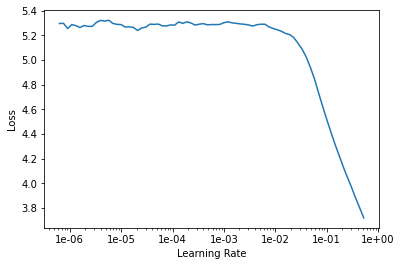

In [234]:
learn = collab_learner(data, n_factors=40, y_range=[0,5.5], wd=.1)
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [235]:
learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss,time
0,5.133296,4.852629,00:00
1,3.655337,0.748627,00:00
2,1.978380,0.210933,00:00
3,1.154336,0.167045,00:00
4,0.719959,0.162201,00:00


[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

In [236]:
#Shows the set of tensors that the model is trying to use predict for
print(users,items)

tensor([ 11, 152,  82,  98, 134,  29,  53, 169, 133, 170,  79, 117, 107,  54,
         41,  40,  99,  83,   5, 134,  61, 149,  95, 138, 114,  33, 115,  40,
         62,  10, 173, 119, 166, 164,  51, 151,  68,  21, 167,  54, 165, 175,
         60, 147,   7, 137, 103, 111, 102, 156,   4,  86,  29, 172, 163, 163,
        171, 111,   1, 120, 117, 112, 151,   6]) tensor([ 5, 11,  2,  9,  0, 14,  3,  6,  2,  9, 18, 14,  5,  9,  6, 10,  2,  5,
        11,  6,  5,  0,  2,  8,  6,  9,  9,  5,  6,  8, 14,  8,  9,  6,  4, 14,
         0,  9,  6,  5,  2,  4,  3,  4,  8, 14,  2,  4,  2,  9,  6,  6,  6,  6,
         2,  5,  2,  2,  2,  8, 18,  5,  6,  2])


In [237]:
#Defining users and items that 
(users, items), ratings = next(iter(data.valid_dl))

preds = learn.model(users, items)
print('Real\tPred\tDifference')
for p in list(zip(ratings, preds))[:16]:
    print('{}\t{:.1f}\t{:.1f}'.format(p[0],p[1],p[1]-p[0]))

[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


Real	Pred	Difference
0.0	0.3	0.3
1.0	0.8	-0.2
0.0	0.6	0.6
0.0	0.9	0.9
1.0	0.9	-0.1
1.0	0.4	-0.6
0.0	0.5	0.5
0.0	0.4	0.4
1.0	1.1	0.1
0.0	0.4	0.4
0.0	0.3	0.3
0.0	0.5	0.5
0.0	0.8	0.8
1.0	0.4	-0.6
0.0	0.5	0.5
0.0	0.3	0.3


[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


# Categorizing the TV Shows into genres using TheMovieDB API

In [ ]:
# #Dependencies for API
# import requests
# import json

# from api_key import movie_api

In [ ]:
# shows = survey_df["tv_show"].tolist()
# print(shows)

In [ ]:
# movie_url = "https://api.themoviedb.org/3/search/movie?api_key="+movie_api

# ids = []
# titles = []
# genre_id = []
# test = []

# for movie in broken:
#     search = requests.get(movie_url + "&query="+movie).json()
#     # search = requests.get(movie_url + "&query= CRITICAL ROLE").json()
#     try:
#         movie_id = search['results'][0]['id']
#         titles.append(movie)
#         print(search['results'][0])
#         # cast_url = "https://api.themoviedb.org/3/movie/"+str(movie_id)+"/credits?api_key="+movie_api
#         # response = requests.get(cast_url).json()
    
#         # char_count.append(len(response['cast']))
    
#         #Pulls character list for each movie and adds the movie id into the 'ids' list
#         # for i in range(0,(len(response['cast']))):

#         #     chars.append(response['cast'][i]['character'])
#         #     ids.append(movie_id)
#         #     titles.append(movie)
#         # print(movie)
        
            
#     except:
#         print(f"'{movie}' failed again")